<a href="https://colab.research.google.com/github/viriditass/Miscellaneous/blob/main/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo Simulation**

MIT 강의 링크: https://www.youtube.com/watch?v=OgO1gpXSUzU&ab_channel=MITOpenCourseWare

## **1. Histroy about Monte Carlo Simulation**

확률론의 개척자들이었던 도박사들이 자신이 게임을 이길 확률을 계산하기 위하여 여러 번의 임의추출을 통한 특정한 카드 조합이 나올 확률을 계산했습니다. 하지만 자신이 직접 게임을 계속 진행하는 것은 너무 비효율적이 었습니다. 이후 천재 수학자 폰 노이만이 이를 에니악으로 시뮬레이션을 해보게 됩니다. 이것이 바로 1949년 **Metropolis Uram**이 **모나코**의 유명한 도박 도시 **몬테카를로(Monte Carlo)**의 이름을 본 따 명명한 몬테카를로 시뮬레이션의 탄생 이야기입니다.

## **2. What is Monte Carlo Simulation**

몬테카를로 시물레이션이란 알려지지 않은 값을 **추론적 통계(inferential statistics)**방법을 이용하여 추정하는 것을 의미합니다. 추론적 통계에서 중요한 개념은 **모집단(population)**과 **샘플(sample)**입니다.

### **Population**

추후 모집단 링크:

### **Sample**

추후 샘플 링크:

### **Important of Random sample**

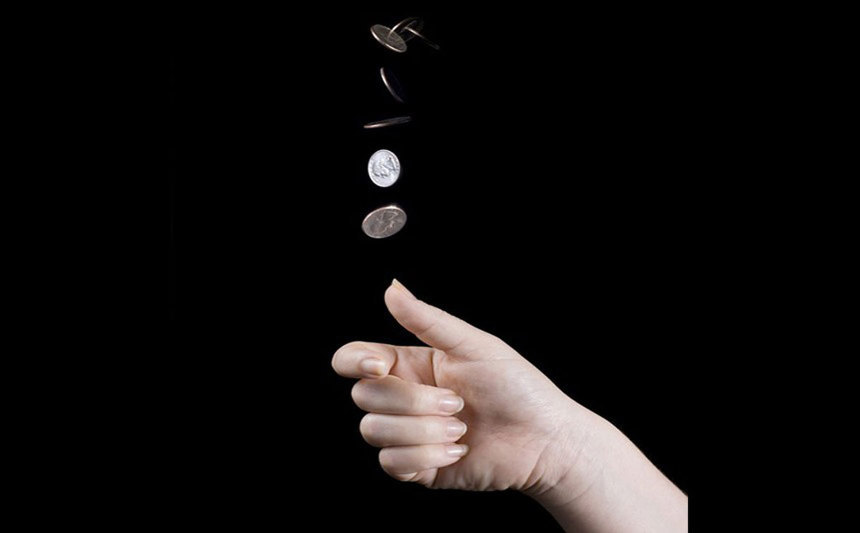

만일, 동전을 총 4번을 던졌을 때 모두 앞면이 나왔다고 가정을 합시다. 그러면 5번째 동전은 앞면이 나온다고 확신할 수 있을까요? 아마 확신할 수 없을 겁니다.

이번엔 100번을 던졌는데, 모두 앞면이 나왔다고 가정을 합시다. 이 경우는 동전의 양면이 모두 앞면이라고 의심할 것입니다. 그리고 101번째 동전을 예측하라 하면 아마 대부분 앞면이라고 예측할 겁니다.

이번 경우는 앞의 경우와 다르게 100번 중 54번이 앞면, 46번이 뒷면이 나왔다고 가정을 합시다. 주어진 데이터를 보면 앞면이 나올 확률은 54/100이 최고의 추정치일 것입니다.

**하지만 이런 추측을 아주 강하게 확신하기는 힘듭니다.** 왜냐하면 우연히 발생했을 수도 있으니깐요. 그렇다면 왜 샘플수가 2였을 때보다 100일 때가 더 나은 추측을 할 수 있었을까요?

### **Variance**

정답은 바로 **분산**에 있습니다.

동전을 100번 던졌을 때 100번 모두 앞면이 나왔을 때는 **분산**이 없었습니다. 답이 항상 같았으니깐요. 분산이 적다는 것은 정답에 대한 확신을 강하게 만들어줍니다. 즉, 샘플을 통해 얻은 답이 모집단의 특성을 가리킨다는 것에 대한 확신입니다. 반면 100번 던졌는데 앞면, 뒷면이 반반씩 나온건 분산(variance)이 커졌음을 의미합니다. 다음번 동전을 던졌을 때 예측하는게 훨씬 어려워졌다는 말이죠. 따라서 분산이 커질수록 같은 크기의 확신을 얻기위해 더 큰 샘플이 필요하다는 의미입니다.


몬테카를로 방법 적용시 주의할 점:
- 입력 값의 확률 분포와 실험의 수학적 모델링이 정확해야함
- 난수의 분포가 분석에 큰 영향을 미치므로 필요한 난수의 범위와 분포에 따른 올바른 난수 생성 함수에 주의

이번에는 룰렛을 예시로 들어보겠습니다. 룰렛은 공이 멈추는 숫자 + 색깔을 맞추는 게임입니다.

In [2]:
import random

class FairRoulette():
  def __init__(self):
    self.pockets = []
    for i in range(1, 37):
      self.pockets.append(i)
    self.ball = None
    self.pocketOdds = len(self.pockets) - 1
  
  def spin(self):
    self.ball = random.choice(self.pockets)

  def betPocket(self, pocket, amt):
    if str(pocket) == str(self.ball):
      return amt*self.pocketOdds
    else:
      return -amt

  def __str__(self):
    return 'Fair Roulette'

In [6]:
def playRoulette(game, numSpins, pocket, bet, toPrint):
  totPocket = 0
  for i in range(numSpins):
    game.spin()
    totPocket += game.betPocket(pocket, bet)
  if toPrint:
    print(numSpins, 'spins of', game)
    print('Expected return betting', pocket, '=', str(100 * totPocket / numSpins) + '%\n')
  return (totPocket / numSpins)

game = FairRoulette()
for numSpins in (100, 100000):
  for i in range(3):
    playRoulette(game, numSpins, 2, 1, True)

100 spins of Fair Roulette
Expected return betting 2 = -64.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

100 spins of Fair Roulette
Expected return betting 2 = 80.0%

100000 spins of Fair Roulette
Expected return betting 2 = -0.316%

100000 spins of Fair Roulette
Expected return betting 2 = -0.388%

100000 spins of Fair Roulette
Expected return betting 2 = 0.584%



## **3. Law of Large number**

위의 Roulette Game을 통해 알 수 있는 것이 바로 **대수의 법칙(law of large number)**입니다. 대수의 법칙이란 **성공확률이 p인 독립시행을 무한히 반복한다면 사건 발생확률이 p가 아닌 확률이 0에 수렴**한다는 법칙입니다. 즉, 위의 Roulette Gam에서 만일 룰렛을 무한히 반복한다면 기대 수익은 바로 0이라는 의미입니다.

### **Gambler's Fallacy**

중요한 것은 '무한히'라는 표현인데, 따라서 N번 보다는 N+alpha번이 더 좋은 방법이라는 뜻이 됩니다. 가끔 이 법칙을 잘못이해하는 사람들이 있는데, 이를 **gambler's fallacy**라고 합니다.

야구를 보는데 평소 타율이 높았던 타자가 헛스윙을 여러 번 했다고 합시다. 이때 아나운서는 다음번 타석에서 저 타자가 잘 칠 것이라고 말합니다. 왜냐면 그는 평소에 잘 치기 때문입니다. 즉, 사람들은 편차가 미래로 갈수록 잠잠해지리라 생각하는 것입니다. 하지만 이는 사실이 아닙니다. 룰렛 이야기를 다시 해봅시다. 만약 여러분이 검정이나 빨강에 배팅한다고 합시다. 26번 연속으로 빨강이 나올 확률은 (1/67108865)입니다.

## **4. Regression to the Mean**

그런데 첫번째 시행부터 25번째 시행까지 연속으로 빨강이 나왔다고 했을 때, 26번째가 빨강일 확률은 1/2 입니다. 왜냐면 이는 독립시행이기 때문입니다. 사람들이 gambler’s fallacy와 헷갈리는 것은 **평균으로의 회귀(regression to the mean)**입니다.

**평균으로의 회귀(regression to the mean)**는 이름 그대로 평균으로 회귀한다는 의미입니다. 아버지의 키가 아주 큰 경우에는 아들의 키가 아버지 키보다 높을 확률은 적다는 것이죠. 룰렛을 예로 들면, 공정한 룰렛을 10번 돌려서 10번 빨강이 나왔다고 하면, 이는 극단적인 상황입니다. 1/1024의 확률이 발생한 것이죠. 이때 gambler’s fallacy를 적용하면, 이후 10번 더 돌리면 검정이 많이 나오리라 생각하는 것입니다. 그러나 평균으로의 회귀 개념은 이와 다릅니다. 이후 10번을 더 돌렸을 때 10번의 빨강보다는 더 적은 빨강이 나올 것입니다. 즉, 이전보다는 덜 극단적인 상황이 나온다는 것입니다. 따라서 빨강이 10번보다는 덜 나올 것입니다. 만약 총 20번의 평균을 내면 빨강이 나올 확률은 50%에 더 가까워질 것입니다. 이것이 평균으로의 회귀이고, 샘플이 커질수록 평균에 가까워진다는 것입니다. 즉, **gambler’s fallacy는 이전에 빨강이 10번 나왔으니 다음 10번의 시행에서는 빨강이 5번 미만으로 나올 것**이라고 예측하는 것입니다. 반면 **평균으로의 회귀는 다음 10번의 시행에서 빨강이 10번보다는 적게 나올 것**이라고 예측하는 것입니다.

## **5. Confidence Interval**

우리는 종종 평균만 이용해서 추정합니다. 하지만 모집단의 특성을 추정할 때 하나의 값으로 추정하는 것보다는 신뢰구간을 이용하여 추정하는 것이 더욱 좋습니다. 바로 이 신뢰구간을 결정할 때 표준편차의 개념이 사용됩니다.

### **Standard Deviation**

표준편차(standard deviation)는 항상 평균과 비교해서 생각해야 합니다. 만일 표준편차가 100이라고 하면 큰 값인지 작은 값인지 알 수가 없습니다. 하지만 평균이 100이라고 가정을 하면 이는 엄청 큰 표준편차를 의미하게 됩니다. 반면 평균이 100000000이고, 표준편차가 100이라면 엄청 작은 표준편차를 의미하게 됩니다.